In [1]:
from ProjectPaths import ProjectPaths
from DirectoryFilter import DirectoryFilter
from Histograms import Histograms
import os
import cv2 as cv

In [2]:
directoryFilter = DirectoryFilter(os.path.join(ProjectPaths.instance().image_dir, "Tiles"))

In [11]:
years = ["2013", "2014", "2015", "2016", "2017", "2018"]

In [12]:
filenames_per_year = {year : directoryFilter.dir(year).rgb.images.paths for year in years}
filenames_per_year["2013"][:10], filenames_per_year["2018"][:10]

(['/home/tdjg/Documents/DeepSolaris/Images/Tiles/2013/00001900-3f87-4a57-8e1a-8fbdf3127213_rgb_2013.tiff',
  '/home/tdjg/Documents/DeepSolaris/Images/Tiles/2013/00023872-f873-4889-9b80-113677b9e86a_rgb_2013.tiff',
  '/home/tdjg/Documents/DeepSolaris/Images/Tiles/2013/00024a4c-54fe-4d74-838b-20b8ee7f4777_rgb_2013.tiff',
  '/home/tdjg/Documents/DeepSolaris/Images/Tiles/2013/00031d78-fd98-4371-ac7f-8f2ddf487021_rgb_2013.tiff',
  '/home/tdjg/Documents/DeepSolaris/Images/Tiles/2013/00036fd4-14a1-49a4-ae79-feaa26847d61_rgb_2013.tiff',
  '/home/tdjg/Documents/DeepSolaris/Images/Tiles/2013/0003f83d-6e5b-4413-ac6b-d941996d3390_rgb_2013.tiff',
  '/home/tdjg/Documents/DeepSolaris/Images/Tiles/2013/000469da-f33d-4f43-816d-9fe2c50b2e45_rgb_2013.tiff',
  '/home/tdjg/Documents/DeepSolaris/Images/Tiles/2013/0004a6c7-799b-438e-bb3d-db24d7a58eba_rgb_2013.tiff',
  '/home/tdjg/Documents/DeepSolaris/Images/Tiles/2013/00051b1f-4030-4eee-a4c2-1fd84fb558fb_rgb_2013.tiff',
  '/home/tdjg/Documents/DeepSolaris/I

In [6]:
def images_for_year(images):
    return [cv.imread(image) for image in images]

In [7]:
histogram_per_year = {year : Histograms.summed_hist_for_images(images_for_year(filenames_per_year[year])) for year in filenames_per_year.keys()}

In [8]:
histogram_per_year["2013"]

array([[227.98659 ,  47.50414 ,  49.71375 ,  50.625748,  50.932053,
         50.84002 ,  50.600094,  50.385124,  50.14827 ,  50.160458,
         50.333786,  50.725872,  51.170673,  51.907967,  52.852024,
         53.95824 ,  55.142056,  56.564358,  58.019684,  59.73555 ,
         61.409878,  63.32425 ,  65.223595,  67.3846  ,  69.4427  ,
         71.79567 ,  74.14416 ,  76.376076,  79.00172 ,  81.71438 ,
         84.42396 ,  87.141426,  89.84728 ,  92.72176 ,  95.61269 ,
         98.6425  , 101.63271 , 104.528435, 107.58109 , 110.70005 ,
        113.726135, 116.90433 , 119.95012 , 123.054016, 126.054596,
        129.3765  , 132.64871 , 135.7391  , 139.01561 , 142.3179  ,
        145.25377 , 148.68105 , 151.99068 , 155.0533  , 158.14906 ,
        161.5012  , 164.60751 , 167.75345 , 171.02574 , 174.04147 ,
        176.97173 , 179.93404 , 182.81465 , 185.75948 , 188.54994 ,
        191.39597 , 194.21661 , 197.059   , 199.2029  , 201.34119 ,
        203.14008 , 204.7476  , 206.12172 , 207.

In [20]:
def plot_histogram(axes, summed_hist, title):
    axes.set_title(title)
    axes.set_xlim(0, 256)
    axes.set_ylim(0, 400)
    for i, c in enumerate(["b", "g", "r"]):
        axes.plot(summed_hist[i, :], color=c)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

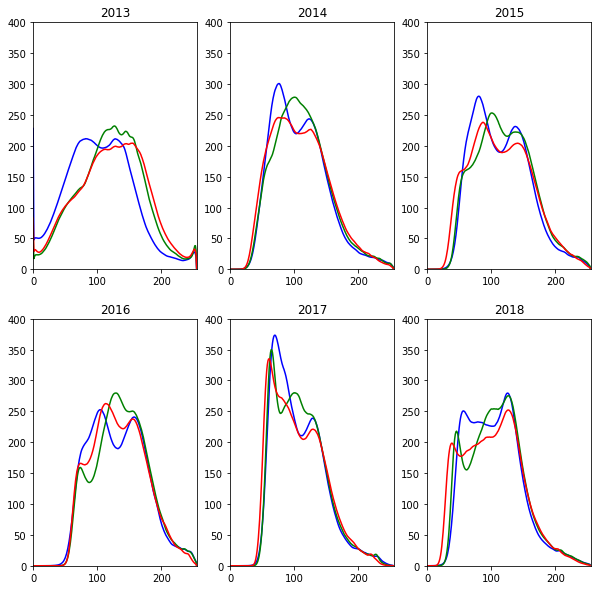

In [21]:
_, ax = plt.subplots(2,3, figsize=(10,10))
i = 0
for r in range(2):
    for c in range(3):
        year = years[i]
        plot_histogram(ax[r, c], histogram_per_year[year], year)
        i += 1

In [39]:
def one_color_histogram(histogram_per_year, color_index, title):
    for i, color in enumerate(["r", "g", "b", "y", "m", "k"]):
        year = years[i]
        plt.plot(histogram_per_year[year][color_index,:], color=color, label = year)
        plt.title(title)
        plt.legend() 

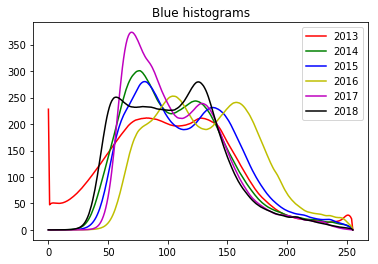

In [40]:
#Draw blue histograms
one_color_histogram(histogram_per_year, 0, "Blue histograms")

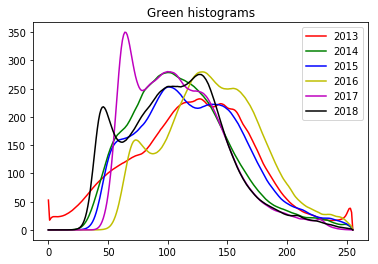

In [41]:
#Draw green histograms
one_color_histogram(histogram_per_year, 1, "Green histograms")

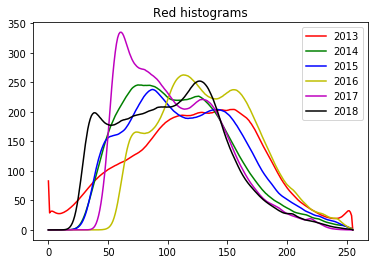

In [42]:
#Draw red histograms
one_color_histogram(histogram_per_year, 2, "Red histograms")

In [47]:
first_images = [cv.imread(filenames_per_year[year][1]) for year in years]

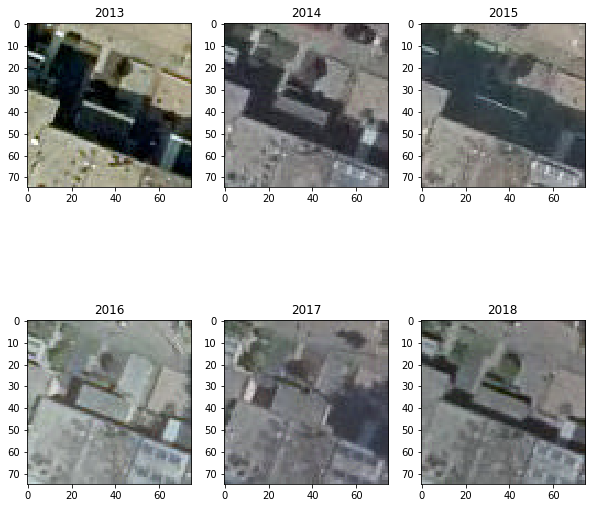

In [51]:
_, ax = plt.subplots(2,3, figsize=(10,10))
i = 0
for r in range(2):
    for c in range(3):
        ax[r,c].imshow(first_images[i][:,:,::-1])
        ax[r,c].set_title(years[i])
        i += 1